In [32]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

# 使用一个分类的数据

In [33]:
df=pd.read_csv('./datas/iris.data',header=None)
df.columns=['a','b','c','d','class']
print(df.head())
print('查看有几个类别:\n',df['class'].value_counts())
df['class']=pd.Categorical(df['class']).codes
print('对类别字符串进行转码:\n',df['class'].value_counts())
df=df[df['class']!=2]
print('排除掉第2类:\n',df['class'].value_counts())
x=df.drop(['class'],1)
y=df['class']
print('x的特征:\n',x.head())
print('y的类别:\n',y.head())

     a    b    c    d        class
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
查看有几个类别:
 Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64
对类别字符串进行转码:
 2    50
1    50
0    50
Name: class, dtype: int64
排除掉第2类:
 1    50
0    50
Name: class, dtype: int64
x的特征:
      a    b    c    d
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
y的类别:
 0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int8


# 使用梯度下降法求解

In [34]:
#使用梯度下降法求解

#概率转换成01的类数据
def prob2class(y_prob):
    y_class = [1 if i>=0.5  else 0 for i in y_prob]
    return y_class

#sigmoid函数
def sigmoid(theta,x):
    prob = 1/(1+np.exp(-x.dot(theta)))
    return prob.values

#损失函数
def lr_loss(y_true,prob):
    laplace = 1e-10
    lr_loss = - sum(y_true * np.log(prob).ravel() + (1-y_true) * np.log(1-prob+laplace).ravel()) + 1/len(y)*np.power(theta,2).sum()
    return lr_loss
#初始化aplha 和 theta
alpha =0.02
theta = np.zeros((4,1))
theta

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [36]:
#梯度下降法开始迭代 
y_true = y.reshape(-1,1)
lr_prob = sigmoid(theta,x)
#print(lr_prob)
lr_class = prob2class(lr_prob)
print(lr_class)
theta = theta + alpha * x.T.dot(y_true - sigmoid(theta,x))
lr_loss(y,lr_prob)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


/Users/hushiwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


0    172.010021
dtype: float64

In [42]:
x=np.random.randint(1,5,(5,1))
y=np.random.randint(1,5,(5,1))
print(x)
print(y)

[[3]
 [3]
 [1]
 [3]
 [2]]
[[3]
 [1]
 [4]
 [1]
 [3]]


In [44]:
x.T.dot(y)

array([[25]])

In [47]:
y.T.dot(x)

array([[25]])

In [52]:
def sigmoid_func1(theta,x):
    return 1/(1+np.exp(-theta.T.dot(x)))


In [53]:
sigmoid_func1(x,y)

array([[ 1.]])

In [54]:

def sigmoid_func(z):
    return 1/(1+np.exp(-z))



In [55]:
z=10
sigmoid_func(10)

0.99995460213129761

In [56]:
x=pd.Series(np.arange(-10,10,0.01))
y=x.apply(lambda x :sigmoid_func(x))

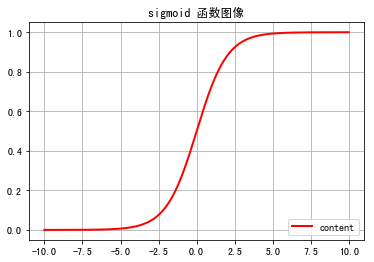

In [57]:
plt.figure(facecolor='w')
plt.plot(x,y,'r-',linewidth=2,label="content")
plt.legend(loc='lower right')
plt.title("sigmoid 函数图像")
plt.grid(b=True)
plt.show()

In [58]:
y.head()

0    0.000045
1    0.000046
2    0.000046
3    0.000047
4    0.000047
dtype: float64

In [59]:
sigmoid_func(1)

0.7310585786300049